# Ecuaciones diferenciales de segundo orden
## Diferencias finitas

In [1]:
# Importar librerias necesarias
import numpy as np
import matplotlib.pyplot as plt



El método de diferencias finitas consiste en aproximar la derivada de una función de manera discreta.
Recordemos la definición de derivada de una función $f(x)$:
$$ \frac{df}{dx} = \lim_{\Delta x\rightarrow 0} \frac{f(x+\Delta x) - f(x)}{\Delta x}$$
La segunda derivada se aproxima, siguiendo la misma lógica, de esta manera:
$$ \frac{d^2f}{dx^2} = \lim_{\Delta x\rightarrow 0} \frac{f(x+\Delta x) - 2 f(x) + f(x-\Delta x)}{\Delta x^2}$$
Estas definiciones se extienden a funciones de varias variables $f(x_i)$, $i=1, ..., N$:
$$ \frac{\partial f}{\partial x_i} = \lim_{\Delta x_i\rightarrow 0} \frac{f(x_i+\Delta x_i, x_{j\neq i}) - f(x_i, x_{j\neq i})}{\Delta x_i}$$
$$ \frac{\partial ^2f}{\partial x_i^2} = \lim_{\Delta x_i\rightarrow 0} \frac{f(x_i+\Delta x_i, x_{j\neq i}) - 2 f(x_i, x_{j\neq i}) + f(x_i-\Delta x_i, x_{j\neq i})}{\Delta x_i^2}$$

De esta manera tenemos las piezas para ensamblar la solucion a una ecuación diferencial de segundo orden, por ejemplo la ecuación de difusion:

## Ecuación de Difusión

La ecuación de difusión es una ecuación de segundo orden en el espacio y de primer orden en el tiempo (como la ecuación de Schrodinger) y es común en problemas relacionados con materiales ya que describe como cambia la temperatura o la concentración de un material en función del tiempo, por ejemplo.

La ecuación es:
$$ D\left(\frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2} \right) = \frac{\partial f}{\partial t}$$
Que discretizamos de la siuguiente manera, donce el indice $k$ denota tiempo, $i$ coordenada $x$ y $j$ coordenada $y$:
$$f(x+\Delta x, y, t) = f^k_{i+1,j}$$
$$f(y+\Delta y, x, t) = f^k_{i,j+1}$$
$$f(t+\Delta t, x, y) = f^{k+1}_{i,j}$$

$$ D\left( \frac{f_{i+1, j}^{k} - 2f_{i, j}^{k} + f_{i-1, j}^{k}}{\Delta x^2} + \frac{f_{i, j+1}^{k} - 2f_{i, j}^{k} + f_{i, j-1}^{k}}{\Delta y^2} \right) = \frac{f_{i, j}^{k+1} - f_{i, j}^{k}}{\Delta t}$$

Como queremos conocer el estado de la lámina en un tiempo siguiente, despejamos
$$ \Delta t D\left( \frac{f_{i+1, j}^{k} - 2f_{i, j}^{k} + f_{i-1, j}^{k}}{\Delta x^2} + \frac{f_{i, j+1}^{k} - 2f_{i, j}^{k} + f_{i, j-1}^{k}}{\Delta y^2} \right)  + f_{i, j}^{k} = f_{i, j}^{k+1}$$

In [10]:
#Se definen los parámetros a utilizar en la solución de la ecuación diferencial.
Nt=100000 #número de iteraciones/tiempos.
tmin=0. #tiempo inicial
tmax=1249. #tiempo final
dt=(tmax-tmin)/Nt #espaciamiento entre instantes de tiempo
Nl=100 #número de elementos de espacio (amplitud de la red)
xmin=-10. #\
xmax=10. #- intervalo de integración en x
ymin=-10.#- intervalo de integración en y
ymax=10.  #/
xcoords=np.linspace(xmin, xmax, Nl) #arreglos con las cordenadas en x
ycoords=np.linspace(ymin, ymax, Nl) #arreglos con las coordenadas en y
dx=(xmax-xmin)/Nl #espaciamiento entre coordenadas x.
dy=(ymax-ymin)/Nl #espaciamiento entre coordenadas y.

D=np.exp(-1e3/473.) 


In [13]:
lamina=np.zeros([Nt, Nl, Nl])
lamina[0, :, 0]=10
lamina[0, :, -1]=10
lamina[0, -1, :]=10
lamina[0, 0, :]=10

In [14]:
#Se soluciona la ecuaciín diferencial con el método de relajación
for i in range(1, Nt):
    if i%10000==0:
        print(i)
    laminapasado=lamina[i-1]
    lamina[i]=dt*D*((np.roll(laminapasado, -1, axis=0) - 2*laminapasado + np.roll(laminapasado, 1, axis=0))/dx**2 + \
                     (np.roll(laminapasado, -1, axis=1) - 2*laminapasado + np.roll(laminapasado, 1, axis=1))/dy**2) + \
                    laminapasado
    lamina[i, :, 0]=10
    lamina[i, :, -1]=10
    lamina[i, -1, :]=10
    lamina[i, 0, :]=10


10000
20000
30000
40000
50000
60000
70000
80000
90000


Text(0.5, 0, 'Final')

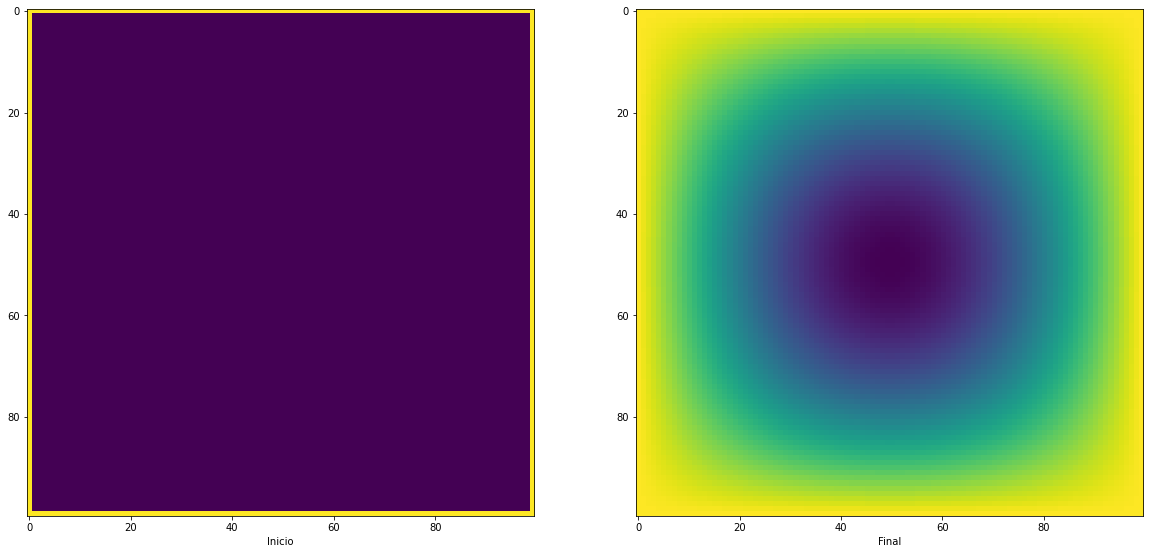

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(lamina[0, :, :])
ax[1].imshow(lamina[-1, :, :])
ax[0].set_xlabel('Inicio')
ax[-1].set_xlabel('Final')

In [16]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/QW7pN0IHmjg" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')


/home/daniel/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Otros métodos son comunes al solucionar ecuaciones diferenciales de segundo orden, en especial, es común convertirlas en un sistema de dos ecuaciones de primer orden acopladas. Lastimosamente el tiempo es muy corto para introducir estas pero adjunto un [link](https://github.com/dforero0896/CSPS_Tasks/blob/master/task1/src/harmosc_euler.cpp) a código que aplica estos métodos.

Esto se hace introduciendo, por ejemplo
$p=\frac{df}{dx}$
de manera que esta ecuacion junto con
$\frac{dp}{dx}=F(f)$
completan el sistema. 
En particular, la segunda ley de newton puede formularse de esta manera:
$\frac{d^2f}{dx}=F(f)$
donde $f$ puede verse como la posición y $x$ el tiempo.